# Introduction to Pandas
This section heavily draws from Dr. Kevin Sheppard's [Python for Econometrics](https://www.kevinsheppard.com/Python_for_Econometrics). A huge thank you to him for all of his hard work in organizing a thorough introduction to Pandas.
## Series
### Generating Series
Series are the most atomic unit of Pandas from which more complex data structures will be built. Series are extensions of NumPy arrays with dictionary-like properties. 

In [1]:
import numpy as np
from pandas import Series

## Define a basic array.
arr = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

## Convert to Series.
series = Series(arr)
series

0    0.0
1    0.2
2    0.4
3    0.6
4    0.8
5    1.0
dtype: float64

As can be seen, Series store arrays with indices. In this case, the indices were autogenerated as a list of integers starting from 0. Let us make the indices more explict.

In [2]:
indices = ['a', 'b', 'c', 'd', 'e', 'f']
series = Series(arr, index=indices)
series

a    0.0
b    0.2
c    0.4
d    0.6
e    0.8
f    1.0
dtype: float64

Series can also be generated from pythonic dictionaries.

In [3]:
d = dict(a = 0.0, b = 0.2, c = 0.4, d = 0.6, e = 0.8, f = 1.0)
series = Series(d)
series

a    0.0
b    0.2
c    0.4
d    0.6
e    0.8
f    1.0
dtype: float64

With indices, Series are a hybrid NumPy array and pythonic dictionary. The indexing/slicing behavior of Series supports this.

In [4]:
series['d']    # Lookup like dictionary

0.59999999999999998

In [5]:
series[[1,4]]  # Index like array

b    0.2
e    0.8
dtype: float64

In [6]:
series[:3]     # Slice like array.

a    0.0
b    0.2
c    0.4
dtype: float64

Similar to arrays, Series can have operations performed across them. This can be helpful for indexing.

In [7]:
series + 0.5

a    0.5
b    0.7
c    0.9
d    1.1
e    1.3
f    1.5
dtype: float64

In [8]:
series > 0.5 

a    False
b    False
c    False
d     True
e     True
f     True
dtype: bool

In [9]:
series[series > 0.5]

d    0.6
e    0.8
f    1.0
dtype: float64

Series also support mathemathical operations across two (or more) of themselves. Importantly, Series align themselves over their indices. 

In [10]:
s1 = series[:3]    # [a, b, c]
s2 = series[:3]    # [a, b, c]
s3 = series[2:-1]  # [c, d, e] 

s1 * s2

a    0.00
b    0.04
c    0.16
dtype: float64

Just like dictionaries, the respective components of a Series object (indices, array) can be separately accessed. This can be used to update elements of the Series.

In [11]:
series.values

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [12]:
series.as_matrix()

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [13]:
series.index

Index([u'a', u'b', u'c', u'd', u'e', u'f'], dtype='object')

In [14]:
series.index = ['this', 'is', 'an', 'inconvenient', 'series', 'index']
series

this            0.0
is              0.2
an              0.4
inconvenient    0.6
series          0.8
index           1.0
dtype: float64

### Series Attributes
Similar to NumPy arrays, Series objects have a number of useful attributes. 

In [15]:
## Initialize new series.
arr = [2.5, 1.0, np.nan, 3.1, 0.5, 1.0]
indices = ['a', 'b', 'c', 'd', 'e', 'f']
series = Series(arr, index=indices)
series

a    2.5
b    1.0
c    NaN
d    3.1
e    0.5
f    1.0
dtype: float64

In [16]:
## Display first 5 elements of a series.
series.head(5)

a    2.5
b    1.0
c    NaN
d    3.1
e    0.5
dtype: float64

In [17]:
## Display last 5 elements of a series.
series.tail(5)

b    1.0
c    NaN
d    3.1
e    0.5
f    1.0
dtype: float64

In [18]:
## Access element by explicit index (NOTE: lookup must be in index.)
series['a']

2.5

In [19]:
series.loc['a']

2.5

In [20]:
## Access element by index location.
series.iloc[0]

2.5

In [21]:
## Check for null items.
series.isnull()

a    False
b    False
c     True
d    False
e    False
f    False
dtype: bool

In [22]:
## Check for non-null items.
series.notnull()

a     True
b     True
c    False
d     True
e     True
f     True
dtype: bool

In [23]:
## Fill all non-null items.
series.fillna(-1)

a    2.5
b    1.0
c   -1.0
d    3.1
e    0.5
f    1.0
dtype: float64

In [24]:
## Drop null items.
series.dropna()

a    2.5
b    1.0
d    3.1
e    0.5
f    1.0
dtype: float64

In [25]:
## Drop element by index.
series.drop(['b','d'])

a    2.5
c    NaN
e    0.5
f    1.0
dtype: float64

In [26]:
## Return unique values.
series.unique()

array([ 2.5,  1. ,  nan,  3.1,  0.5])

In [27]:
## Return unique value counts.
series.value_counts()

1.0    2
3.1    1
0.5    1
2.5    1
dtype: int64

In [28]:
## Basic description commands (ignores NaNs).
## Also available: max, min, mean, std, median, mode.
series.describe()

count    5.000000
mean     1.620000
std      1.116692
min      0.500000
25%      1.000000
50%      1.000000
75%      2.500000
max      3.100000
dtype: float64

In [29]:
## Series can also be added to or combined.
series['g'] = 5.
series

a    2.5
b    1.0
c    NaN
d    3.1
e    0.5
f    1.0
g    5.0
dtype: float64

In [30]:
series.append(series, ignore_index=False)

a    2.5
b    1.0
c    NaN
d    3.1
e    0.5
f    1.0
g    5.0
a    2.5
b    1.0
c    NaN
d    3.1
e    0.5
f    1.0
g    5.0
dtype: float64

## DataFrames
### Generating DataFrames
In all likelihood, the average analyst will spend very little time working with Series. Instead, the power of Pandas is in the DataFrame, which reproduces the object of the same name from R. Series are important because DataFrames are, in essence, just a series of Series; in other words, DataFrames are a collection of series, each comprising a separate column, and aligned on the index. 

Similar to Series, DataFrames can be initialized from lists, arrays, or dictionaries.

In [31]:
from pandas import DataFrame

## Make data (5 rows, 2 cols).
arr = [[8, 5], [0, 3], [9, 7], [6, 5], [2, 8]]

## Convert to DataFrame.
df = DataFrame(arr, columns=['foxtrot','yankee'])
df

,foxtrot,yankee
0,8,5
1,0,3
2,9,7
3,6,5
4,2,8


In [32]:
## Make data (organized as lists by column).
d = dict( foxtrot = [8, 0, 9, 6, 2],
          yankee = [5, 3, 7, 5, 8] )

## Conver to DataFrame
df = DataFrame(d)
df

,foxtrot,yankee
0,8,5
1,0,3
2,9,7
3,6,5
4,2,8


Indices can also easily be added to DataFrames.

In [33]:
## Make data (5 rows, 2 cols).
arr = [[8, 5], [0, 3], [9, 7], [6, 5], [2, 8]]

## Convert to DataFrame.
df = DataFrame(arr, columns=['foxtrot','yankee'], index=['a','b','c','d','e'])
df

,foxtrot,yankee
a,8,5
b,0,3
c,9,7
d,6,5
e,2,8


As mentioned above, DataFrames are essentially collections of Series. As such, it should come as no surprise that DataFrames can be initialized from Series as well. DataFrames initialized from Series, however, obey the indices of the series.

In [34]:
df = DataFrame( dict(foxtrot = s1, yankee = s3, hotel = s1) )
df

,foxtrot,hotel,yankee
a,0.0,0.0,NaN
b,0.2,0.2,NaN
c,0.4,0.4,0.4
d,NaN,NaN,0.6
e,NaN,NaN,0.8


Indexing into and slicing DataFrames is very similar to Series. With DataFrames, elements can be accessed by row (index), column, or both. 

In [35]:
## Index into columns by column name.
df['foxtrot']

a    0.0
b    0.2
c    0.4
d    NaN
e    NaN
Name: foxtrot, dtype: float64

In [36]:
## Columns also become attributes of the DataFrame
df.foxtrot

a    0.0
b    0.2
c    0.4
d    NaN
e    NaN
Name: foxtrot, dtype: float64

In [37]:
## Using the columns attribute to get a list of columns
## to index with.
df[ df.columns[:2] ]

,foxtrot,hotel
a,0.0,0.0
b,0.2,0.2
c,0.4,0.4
d,NaN,NaN
e,NaN,NaN


In [38]:
## Index by row by specifying index name.
df.loc['a']

foxtrot    0.0
hotel      0.0
yankee     NaN
Name: a, dtype: float64

In [39]:
## Slice across rows.
df[:3]

,foxtrot,hotel,yankee
a,0.0,0.0,NaN
b,0.2,0.2,NaN
c,0.4,0.4,0.4


In [40]:
## The loc attribute can be used to slice by both column and row.
## Slicing does not work in the same way here unfortunately. 
## Indices need to be specified.
df.loc[df.index[:3], ['foxtrot', 'yankee']]

,foxtrot,yankee
a,0.0,NaN
b,0.2,NaN
c,0.4,0.4


In [41]:
## Selective indexing can also be performed by finding values that
## meet some criterion.
df[df['yankee'] > 0.5 ]

,foxtrot,hotel,yankee
d,NaN,NaN,0.6
e,NaN,NaN,0.8


The components of DataFrames (matrix, columns, indices) are very easily accessible. Moreover, DataFrames are easily converted into other types.

In [42]:
## Access colnames/rownames.
print(df.columns)
print(df.index)

Index([u'foxtrot', u'hotel', u'yankee'], dtype='object')
Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')


In [43]:
## Convert DataFrame to NumPy array.
df.as_matrix()

array([[ 0. ,  0. ,  nan],
       [ 0.2,  0.2,  nan],
       [ 0.4,  0.4,  0.4],
       [ nan,  nan,  0.6],
       [ nan,  nan,  0.8]])

In [44]:
## Convert DataFrame to dict of dicts.
df.to_dict()

{'foxtrot': {'a': 0.0,
  'b': 0.20000000000000001,
  'c': 0.40000000000000002,
  'd': nan,
  'e': nan},
 'hotel': {'a': 0.0,
  'b': 0.20000000000000001,
  'c': 0.40000000000000002,
  'd': nan,
  'e': nan},
 'yankee': {'a': nan,
  'b': nan,
  'c': 0.40000000000000002,
  'd': 0.59999999999999998,
  'e': 0.80000000000000004}}

### Reading/Writing DataFrames
Pandas makes it very easy to read and write DataFrames. A number of Pandas functions support reading in different types of data formats, and the DataFrame object has built into it several functions for writing information to disk. 

In [45]:
import os
from pandas import read_excel, read_csv, read_table

## We will load in the first gambling dataset of the first subject. 
## The file is tab-separated, so we will specify tab as the appropriate
## separator. Note that read_table has many, many additional arguments
## to support reading in data of different formats.

df = read_table(os.path.join('gambling', 'subj01_run01.tsv'), sep='\t')
df.head(5)

,onset,duration,parametric loss,distance from indifference,parametric gain,gain,loss,PTval,respnum,respcat,response_time
0,0.0,3,0.1273,-0.0814,-0.139,20,15,5.15,0,-1,0.000
1,4.0,3,-0.0227,-0.4147,-0.189,18,12,6.12,2,1,1.793
2,8.0,3,0.1273,0.2519,-0.389,10,15,-4.85,3,0,1.637
3,18.0,3,0.1773,-0.0814,0.211,34,16,18.16,1,1,1.316
4,24.0,3,-0.3727,-0.0814,-0.189,18,5,13.05,1,1,1.670


### DataFrame Attributes

Adding and dropping columns is very simple with Pandas. Here we will remove several unnecessary columns (e.g. onset, duration parametric loss, etc.) and then add a new variable, diff, which is the difference of the gain and loss variables.

In [46]:
## Drop unnecessary variables.
drop_columns = ['onset','duration','parametric loss', 'distance from indifference',
                'parametric gain', 'PTval']
df = df.drop(drop_columns, axis=1)    # axis specifies that we are dropping along columns.
df.head(5)

,gain,loss,respnum,respcat,response_time
0,20,15,0,-1,0.000
1,18,12,2,1,1.793
2,10,15,3,0,1.637
3,34,16,1,1,1.316
4,18,5,1,1,1.670


In [47]:
## Add difference column.
df['diff'] = df['gain'] - df['loss']
df.head(5)

,gain,loss,respnum,respcat,response_time,diff
0,20,15,0,-1,0.000,5
1,18,12,2,1,1.793,6
2,10,15,3,0,1.637,-5
3,34,16,1,1,1.316,18
4,18,5,1,1,1.670,13


It is also easy to rename columns. This can be accomplished by directly saving column names to the DataFrame colummns attribute, or we can use the rename attribute.

In [48]:
# df.columns = ['c1','c2','c3','c4','c5','c6']
df = df.rename(columns={'response_time':'rt'})
df.head(5)

,gain,loss,respnum,respcat,rt,diff
0,20,15,0,-1,0.000,5
1,18,12,2,1,1.793,6
2,10,15,3,0,1.637,-5
3,34,16,1,1,1.316,18
4,18,5,1,1,1.670,13


Dropping rows is similarly easy. In this dataset, any respcat = -1 corresponds to a missing response. Let's remove those from the dataset. This can be achieved in a variety of ways.

In [49]:
## Aproach 1: Remove directly by indexing.
df[df['respcat'] != -1].head(5)

,gain,loss,respnum,respcat,rt,diff
1,18,12,2,1,1.793,6
2,10,15,3,0,1.637,-5
3,34,16,1,1,1.316,18
4,18,5,1,1,1.670,13
5,26,13,2,1,1.232,13


In [50]:
## Approach 2: Set all undesirable values to NaN. Use dropna.
df['respcat'] = np.where(df['respcat'] == -1, np.nan, df['respcat'])
df.head(5)

,gain,loss,respnum,respcat,rt,diff
0,20,15,0,NaN,0.000,5
1,18,12,2,1.0,1.793,6
2,10,15,3,0.0,1.637,-5
3,34,16,1,1.0,1.316,18
4,18,5,1,1.0,1.670,13


In [51]:
## Notice the index reflects the dropped trials!
df = df.dropna()
df.head(5)

,gain,loss,respnum,respcat,rt,diff
1,18,12,2,1.0,1.793,6
2,10,15,3,0.0,1.637,-5
3,34,16,1,1.0,1.316,18
4,18,5,1,1.0,1.670,13
5,26,13,2,1.0,1.232,13


Additional useful functions include: transpose, drop_duplicates (remove duplicate rows), and fillna (replace all missing data with some value).

Now lets sort the DataFrame.

In [52]:
## Sorting by one column.
df.sort_values('gain').head(5)

,gain,loss,respnum,respcat,rt,diff
2,10,15,3,0.0,1.637,-5
28,10,6,3,0.0,1.137,4
78,10,12,3,0.0,1.383,-2
59,10,11,4,0.0,1.806,-1
69,10,7,2,1.0,1.320,3


In [53]:
## Sorting by multiple columns.
df.sort_values(['gain', 'loss'], ascending=False).head(5)

,gain,loss,respnum,respcat,rt,diff
79,40,19,1,1.0,0.862,21
27,40,15,1,1.0,1.169,25
32,40,13,1,1.0,0.776,27
74,40,10,1,1.0,0.783,30
24,40,7,1,1.0,0.824,33


In [54]:
## Basic description commands (ignores NaNs).
## Also available: max, min, mean, std, median, mode.
df.describe().round(2)

,gain,loss,respnum,respcat,rt,diff
count,85.00,85.00,85.00,85.0,85.00,85.0
mean,25.62,12.42,1.93,0.8,1.32,13.2
std,9.31,4.77,0.95,0.4,0.34,10.5
min,10.00,5.00,1.00,0.0,0.73,-6.0
25%,18.00,8.00,1.00,1.0,1.08,4.0
50%,26.00,12.00,2.00,1.0,1.27,13.0
75%,34.00,17.00,2.00,1.0,1.53,21.0
max,40.00,20.00,4.00,1.0,2.30,35.0


In [55]:
## Another very useful command is value_counts.
df['respnum'].value_counts()

2    36
1    32
4     9
3     8
Name: respnum, dtype: int64

One other important command to highlight is apply. This command is similar to apply_across_axis, and can be used to apply a command row-/col-wise across a DataFrame.

In [56]:
## Apply zscore function across columns.
def zscore(arr):
    return (arr - arr.mean()) / arr.std()

df.apply(zscore, axis=0).head(5)    # Apply across columns.

,gain,loss,respnum,respcat,rt,diff
1,-0.818676,-0.088802,0.074418,0.49705,1.382515,-0.685914
2,-1.677781,0.540210,1.128675,-1.98820,0.927454,-1.733839
3,0.899533,0.749880,-0.979839,0.49705,-0.008923,0.457276
4,-0.818676,-1.556495,-0.979839,0.49705,1.023717,-0.019053
5,0.040428,0.120869,0.074418,0.49705,-0.253956,-0.019053


### Combining DataFrames
Combining DataFrames is one of the most important operations in Pandas. This is achieved in one of three ways:
1. Append: add row to existing DataFrame
2. Concat: join two or more DataFrames with identical columns
3. Merge: join two or more DataFrames with non-overlapping columns based on a specified index.

Rows can be appended to DataFrames as Series or as dictionaries.

In [57]:
df.tail(3)

,gain,loss,respnum,respcat,rt,diff
83,26,9,1,1.0,1.394,17
84,20,12,2,1.0,1.249,8
85,24,14,2,1.0,1.266,10


In [58]:
## Make series of ones with length equal to columns.
series = Series( np.ones_like(df.columns), index=df.columns)

## Append.
df.append(series, ignore_index=True).tail(3)

,gain,loss,respnum,respcat,rt,diff
83,20,12,2,1.0,1.249,8
84,24,14,2,1.0,1.266,10
85,1,1,1,1.0,1.000,1


In [59]:
## Make dictionary.
d = dict(gain = 1, loss = 1, respnum = 1, respcat = 1, rt = 1, diff = 1)

## Append.
df.append(d, ignore_index=True).tail(3)

,gain,loss,respnum,respcat,rt,diff
83,20,12,2,1.0,1.249,8
84,24,14,2,1.0,1.266,10
85,1,1,1,1.0,1.000,1


The concat command from pandas can be used to horizontally join two DataFrames insofar that they share the same columns.

In [60]:
from pandas import concat

print(df.shape)

df2 = concat([df,df])

print(df2.shape)

(85, 6)
(170, 6)


Finally, the merge command can be used to vertically join two DataFrames along some specified index.

In [61]:
## Separate DataFrame into two sets of variables.
df1 = df[['gain','loss','respnum','respcat']]
df1.head(3)

,gain,loss,respnum,respcat
1,18,12,2,1.0
2,10,15,3,0.0
3,34,16,1,1.0


In [62]:
df2 = df[['gain','loss','rt','diff',]]
df2.head(3)

,gain,loss,rt,diff
1,18,12,1.793,6
2,10,15,1.637,-5
3,34,16,1.316,18


In [63]:
## Merge on columns (gain, loss)
df3 = df1.merge(df2, on=['gain','loss'], how='inner')
df3.head(3)

,gain,loss,respnum,respcat,rt,diff
0,18,12,2,1.0,1.793,6
1,10,15,3,0.0,1.637,-5
2,34,16,1,1.0,1.316,18


In [64]:
## Merge on index (duplicates overlapping columns).
df3 = df1.merge(df2, left_index=True, right_index=True)
df3.head(3)

,gain_x,loss_x,respnum,respcat,gain_y,loss_y,rt,diff
1,18,12,2,1.0,18,12,1.793,6
2,10,15,3,0.0,10,15,1.637,-5
3,34,16,1,1.0,34,16,1.316,18


## Putting it all together
Using the material we've covered so far, we will assemble and describe a dataset.

The dataset we will be working with was taken from [Tom et al. (2007): *The Neural Basis of Loss Aversion
in Decision-Making Under Risk*](http://science.sciencemag.org/content/315/5811/515.full). In this neuroimaging experiment, the brains of 16 individuals were imaged while they performed a task probing decision making. In the task, participants were presented with 50/50 gambles comprised of potential gains and losses. The gains and losses were independently varied, where gains ranged from \$10 to \$40 (in increments of \$2) and losses ranged from \$5 to \$20 (in increments of $1). Participants were instructed to respond with one of four levels of judgments: (1) strongly accept, (2) weakly accept, (3) weakly reject, and (4) strongly reject. Participants each completed 256 total gambles, across three sessions.

The behavioral data for this experiment is stored in the *gambling* folder inside the *Module 2* folder.

### Load and merge gambling data.

In [65]:
import os
import numpy as np
from pandas import DataFrame, concat, read_table

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Specify paths to files. 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## os.listdir is a useful command that lists all of the files in
## a given directory. We are using the string attribute, startswith,
## to limit our search to only files starting with 'subj'.

tsv_files = [f for f in os.listdir('gambling') if f.startswith('subj')]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize an empty list for storing loaded dataframes.
dataframes = []

## Iterate over TSV files.
for tsv in tsv_files:
    
    ## Get subject/run ID: Here we remove the file extension
    ## and split the filename string on the underscore. That 
    ## way we can store the subject ID and run number.
    subj, run = tsv.replace('.tsv','').split('_')
    
    ## Load dataframe. 
    ## os.path.join creates a filepath with its inputs
    ## using the correct path separator for the OS.
    df = read_table( os.path.join('gambling', tsv) )
    
    ## Drop undesired columns.
    drop_columns = ['onset','duration','parametric loss', 'distance from indifference',
                    'parametric gain', 'PTval']
    df = df.drop(drop_columns, axis=1)    # axis specifies that we are dropping along columns.
    
    ## Remove all missing responses (i.e. respcat == -1).
    df = df[ df['respcat'] != -1 ]
    
    ## Rename response time variable.
    df = df.rename(columns={'response_time':'rt'})
    
    ## Store three new varaibles.
    df['diff'] = df['gain'] - df['loss']    # Create difference variable
    df['subj'] = subj                       # Store subject ID.
    df['run']  = run                        # Store run number.
    
    ## Append to list.
    dataframes.append( df )
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Concatenate dataframes.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Concatenate dataframes.
data = concat(dataframes) 

## Sort dataframe.
data = data.sort_values(['subj','run','gain','loss'])
print(data.shape)
data.head(5)

(3942, 8)


,gain,loss,respnum,respcat,rt,diff,subj,run
28,10,6,3,0,1.137,4,subj01,run01
69,10,7,2,1,1.320,3,subj01,run01
59,10,11,4,0,1.806,-1,subj01,run01
78,10,12,3,0,1.383,-2,subj01,run01
2,10,15,3,0,1.637,-5,subj01,run01


In [66]:
## For cleanliness, let's reorder the columns.
data = data[['subj','run','gain','loss','diff','respnum','respcat','rt']]
data.head(5)

,subj,run,gain,loss,diff,respnum,respcat,rt
28,subj01,run01,10,6,4,3,0,1.137
69,subj01,run01,10,7,3,2,1,1.320
59,subj01,run01,10,11,-1,4,0,1.806
78,subj01,run01,10,12,-2,3,0,1.383
2,subj01,run01,10,15,-5,3,0,1.637


In [67]:
## Notice above that the index is out of order. This makes sense
## given how we combined and resorted the data. Let's reset the index.
data = data.reset_index(drop=True)
data.head(5)

,subj,run,gain,loss,diff,respnum,respcat,rt
0,subj01,run01,10,6,4,3,0,1.137
1,subj01,run01,10,7,3,2,1,1.320
2,subj01,run01,10,11,-1,4,0,1.806
3,subj01,run01,10,12,-2,3,0,1.383
4,subj01,run01,10,15,-5,3,0,1.637


### Save aggregated data.
Saving a dataframe is very easy and requires only a single line of code. Here we will save the data as a CSV file, but other options exist including: Excel, HDF, HTML, JSON, SQL, STATA.

In [68]:
## We set index to False to ignore the indices, as they provide no information. 
data.to_csv(os.path.join('gambling', 'group_gambling_data.csv'), index=False)

### Categorical Data
Briefly, it's worth mentioning that Pandas allows for the storage of categorical data. This will map strings to unique integers, and represent the strings as integers internally. This can consierably reduce the memory usage of a DataFrame for large text-heavy datasets.

In [69]:
data.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3942 entries, 0 to 3941
Data columns (total 8 columns):
subj       3942 non-null object
run        3942 non-null object
gain       3942 non-null int64
loss       3942 non-null int64
diff       3942 non-null int64
respnum    3942 non-null int64
respcat    3942 non-null int64
rt         3942 non-null float64
dtypes: float64(1), int64(5), object(2)
memory usage: 246.4+ KB


In [70]:
from pandas import Categorical

data['subj'] = Categorical(data['subj'])
data['run'] = Categorical(data['run'])

data.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3942 entries, 0 to 3941
Data columns (total 8 columns):
subj       3942 non-null category
run        3942 non-null category
gain       3942 non-null int64
loss       3942 non-null int64
diff       3942 non-null int64
respnum    3942 non-null int64
respcat    3942 non-null int64
rt         3942 non-null float64
dtypes: category(2), float64(1), int64(5)
memory usage: 193.4 KB


### GroupBy Tables
The groupby command is a simple yet powerful command that allows the user to aggregate, transform, and filter data efficiently. We will provide examples of each in turn.

#### Aggregation
Compute some summary statistic over groups in the data. For example, we will compute some averages across subjects here.

In [71]:
## Create groupby object, grouped over subject.
gb = data.groupby('subj')
gb

In [72]:
## Compute mean over responses and reaction time.
gb[['respcat','rt']].mean()

,respcat,rt
subj,,
subj01,0.850980,1.339651
subj02,0.290323,1.691262
subj03,0.235294,1.148149
subj04,0.245059,1.472221
subj05,0.396552,1.657787
subj06,0.500000,1.083027
subj07,0.754237,1.349017
subj08,0.717131,1.217502
subj09,0.324111,1.468735


In [73]:
## It is possible to create groupby objects over multiple dimensions.
gb = data.groupby(['gain','loss'])
gb.respcat.mean()

gain  loss
10    5       0.562500
      6       0.200000
      7       0.200000
      8       0.187500
      9       0.187500
      10      0.125000
      11      0.062500
      12      0.062500
      13      0.000000
      14      0.000000
      15      0.066667
      16      0.000000
      17      0.000000
      18      0.000000
      19      0.062500
      20      0.000000
12    5       0.733333
      6       0.466667
      7       0.312500
      8       0.312500
      9       0.142857
      10      0.125000
      11      0.062500
      12      0.000000
      13      0.000000
      14      0.000000
      15      0.000000
      16      0.000000
      17      0.000000
      18      0.000000
                ...   
38    7       0.937500
      8       1.000000
      9       0.937500
      10      0.800000
      11      0.866667
      12      0.785714
      13      0.812500
      14      0.666667
      15      0.562500
      16      0.812500
      17      0.533333
      18      0.533333


As an aside, pivot/pivot_table functions of DataFrames can accomplish something similar.

In [109]:
## Use pivot_table to compute the equivalent of GroupBy 
## on gain & loss, averaging over respcat.
data.pivot_table(index='gain', columns='loss', values='respcat', aggfunc='mean').round(2)

loss,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
gain,,,,,,,,,,,,,,,,
10,0.56,0.20,0.20,0.19,0.19,0.12,0.06,0.06,0.00,0.00,0.07,0.00,0.00,0.00,0.06,0.00
12,0.73,0.47,0.31,0.31,0.14,0.12,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
14,0.73,0.47,0.60,0.53,0.44,0.19,0.20,0.13,0.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00
16,0.93,0.62,0.69,0.62,0.38,0.40,0.31,0.25,0.13,0.19,0.13,0.06,0.00,0.00,0.00,0.00
18,0.93,0.80,0.60,0.67,0.56,0.38,0.31,0.33,0.19,0.27,0.12,0.12,0.13,0.19,0.00,0.06
20,0.92,0.93,0.87,0.88,0.81,0.44,0.38,0.44,0.40,0.27,0.18,0.27,0.25,0.14,0.13,0.06
22,1.00,0.81,0.93,0.88,0.60,0.47,0.38,0.50,0.38,0.33,0.21,0.31,0.33,0.14,0.19,0.12
24,1.00,0.94,0.93,0.88,0.87,0.50,0.53,0.47,0.50,0.40,0.44,0.27,0.29,0.29,0.21,0.14
26,1.00,1.00,0.94,0.94,0.80,0.50,0.56,0.50,0.57,0.40,0.47,0.33,0.47,0.44,0.25,0.25


#### Transformation
Transform values meeting some specific criterion according to a specified function. Here we will impute missing response times as the mean of the response times for a given subject.

In [75]:
## Make a copy of the original dataset.
missing_data = data.copy()

## Add missing data for two subjects.
d = dict(subj='subj01', run='run01', gain=10, loss=6, diff=4, respnum=2, respcat=0, rt=np.nan)
missing_data = missing_data.append(d, ignore_index=True)

d = dict(subj='subj10', run='run01', gain=10, loss=6, diff=4,respnum=2, respcat=0, rt=np.nan)
missing_data = missing_data.append(d, ignore_index=True)

missing_data.tail(3)

,subj,run,gain,loss,diff,respnum,respcat,rt
3941,subj16,run03,40,20,20,2,1,1.417
3942,subj01,run01,10,6,4,2,0,NaN
3943,subj10,run01,10,6,4,2,0,NaN


In [76]:
## Make groupby object.
gb = missing_data.groupby('subj')

## Transform by subject on missing data.
imputed_data = gb.transform(lambda x: x.fillna(x.mean()))

imputed_data.tail(3)

,gain,loss,diff,respnum,respcat,rt
3941,40,20,20,2,1,1.417000
3942,10,6,4,2,0,1.339651
3943,10,6,4,2,0,1.798399


#### Filtration
Filter a dataset accordign to some criterion. Here we will create a new subset of data comprised of only subjects who took the risky bet more than half the time.

In [77]:
## Group by subject.
gb = data.groupby('subj')

## Filter on responses.
filtered_data = gb.filter(lambda x: x.respcat.mean() > 0.5)

## Identify remaining subjects.
filtered_data['subj'].unique()

[subj01, subj07, subj08, subj10, subj11, subj12, subj16]
Categories (7, object): [subj01, subj07, subj08, subj10, subj11, subj12, subj16]

# Introduction to Data Visualization
## Matplotlib
Matplotlib, or the Matlab plotting library, is the core plotting package of the scientific python distribution. The aim of Matplotlib is to recreate all of the plotting capabilities of Matlab in python. As such, much of the syntax/style of Matplotlib reflects Matlab plotting. 

We will go through the syntax of plotting the five most common types of plots: bar plots, line plots, scatter plots, boxplots, and heatmaps. We will also cover adding details to plots (e.g. axes, titles, legends, errorbars), making multiple plots in one figure, and scaling/sizing plots.

Similar to plotting in R, pure Matplotlib is a little clunky and a lot of code is needed to make more visually appealing plots. For this reason, we will introduce the Seaborn package later. Seaborn is similar to ggplot2 in that, with a tidy dataframe and some knowledge of the syntax, beautiful plots can quickly/easily be generated. But, it's better to crawl before walking, so we'll start with Matplotlib first.

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline 

## NOTE: The second line is a bit of notebook magic! 
## It's a jupyter-notebook shortcut that makes all
## plots be displayed at the bottom of a cell.

### Figures & Axes
A brief note: In Matplotlib jargon, an axis is a plot (e.g. barplot, scatterplot) and a figure is the surrounding object containing all plots. The most basic figure contains a single axis (i.e. one plot). More complex figures may have multiple plots of different sizes and numbers per row. 

This distinction is important because certain graphical tweaks can only be applied to figures or axes. For example, figures control the size of the canvas, the spacing of plots, and saving figures. Axes control plot-specific features, including labels, titles, and legends. To start, we will only generate figures with one plot. Later, we will introduce drawing multiple plots per figure.

### Barplots
Barplots are probably the least intuitive plot in Matplotlib because the user must specify the starting point and width of the bars (this is in contrast to other languages that automatically assign x-coordinates to the bars). Though clunky, this does provide some additional control to the user. 

In this example, we will plot the average response within subjects.

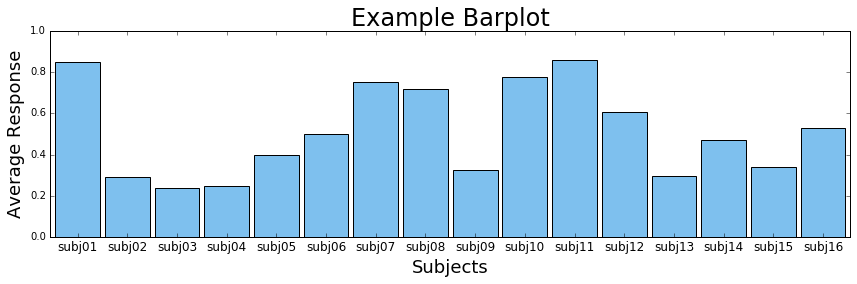

In [79]:
## Open new figure canvas. Define its size.
fig = plt.figure(figsize=(12,4))

## Make a new axis: The numbers correspond to
## row, column, and plot index. For example,
## subplot(211) would mean creating the 
## first plot of a figure with 2 rows and 1 column.
ax = plt.subplot(111)

## Use groupby to compute average response.
avg_resp = data.groupby('subj').respcat.mean()

## Now we have to specify the starting positions of
## the bars along the x-axis. We will have each bar
## begin at a sequential integer for each new subject
## (i.e., 0, 1, 2, ... N).
n_subj = len(avg_resp)
xpos = np.arange(n_subj)

## Now we can plot.
width = 0.9
ax.bar(left=xpos, height=avg_resp, width=width, color='#7ec0ee');

## Fix x-axis.
ax.set_xlim(-0.1);                                   # Start x-axis at -0.1 to leave equal room 
                                                     # on both sides.
ax.set_xticks(xpos + width / 2.);                    # Set x-tickmarks at center of bars.
ax.set_xticklabels(data.subj.unique(), fontsize=12); # Set subjects as x-ticklabels
ax.set_xlabel('Subjects', fontsize=18);              # Set x-axis label.

## Fix y-axis.
ax.set_ylim(0,1);
ax.set_ylabel('Average Response', fontsize=18);

## Set title.
ax.set_title('Example Barplot', fontsize=24);

## Autoscale image.
plt.tight_layout();    # Reduce whitespace outside of plot.

Grouped barplots must be manually generated, as in the following example where we plot the average response and reponse time data by subject.

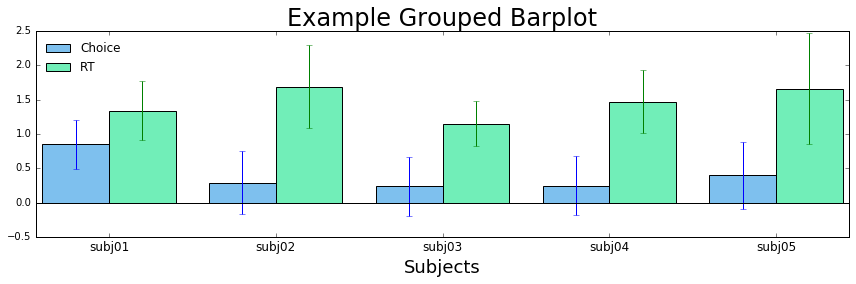

In [80]:
## Open new figure canvas. Define its size.
fig = plt.figure(figsize=(12,4))

## Make a new axis.
ax = plt.subplot(111)

## Use groupby to compute averages.
gb = data.groupby('subj')
avg_resp = gb.respcat.mean()
std_resp = gb.respcat.std()
avg_rt = gb.rt.mean()
std_rt = gb.rt.std()

## Specify the starting positions of the bars.
n_subj = 5
resp_pos = [0.0, 2.5, 5.0, 7.5, 10.0]
rt_pos = [1.0, 3.5, 6.0, 8.5, 11.0]

## Make barplots. Here we use the yerr flag to make error bars.
## we also define the condition using label.
width = 1.0
ax.bar(resp_pos, avg_resp[:n_subj], width, label = 'Choice',
       yerr=std_resp[:n_subj], color='#7ec0ee');
ax.bar(rt_pos, avg_rt[:n_subj], width, label='RT',
       yerr=std_rt[:n_subj], color='#71eeb8');

## Fix x-axis.
ax.set_xlim(-0.1, 12.1);
ax.set_xticks(rt_pos);
ax.set_xticklabels(data.subj.unique(), fontsize=12);
ax.set_xlabel('Subjects', fontsize=18);

## Set title.
ax.set_title('Example Grouped Barplot', fontsize=24);

## Set horizontal line. Starts at zero and travels 
## length of plot.
ax.hlines(0, -0.1, 12.1, color='black')

## Add legend.
ax.legend(loc='best', frameon=False)

## Autoscale image.
plt.tight_layout();    # Reduce whitespace outside of plot.

### Lineplots
Lineplots are more intuitive than are barplots, requirng at the minimum only the x- and y-datapoints. Many tweaks and embellishments can similarly be added. 

Here we will plot the nominal likelihood-of-take of the risky bet against the diff values. In the example, we use the Matplotlib color shorthands. These are:
* b: blue 
* g: green 
* r: red 
* c: cyan 
* m: magenta 
* y: yellow
* k: black 
* w: white

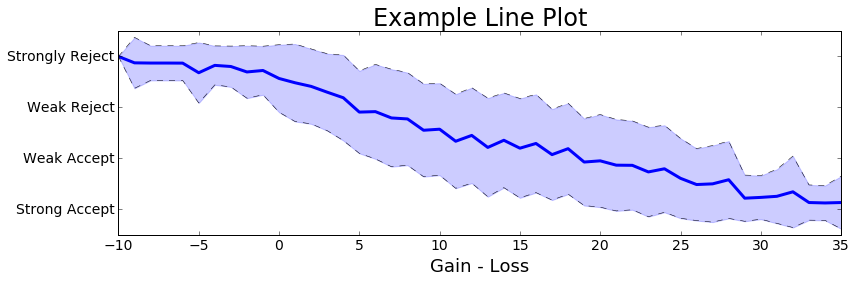

In [81]:
## Open new figure canvas. Define its size.
fig = plt.figure(figsize=(12,4))

## Make a new axis.
ax = plt.subplot(111)

## Compute groupby gain.
gb = data.groupby('diff')
respnum_avg = gb.respnum.mean()

## Plot average gain response.
## In this example, we use the matplotlib color shorthands. 
ax.plot( respnum_avg.index, respnum_avg, color='b', linewidth=3 );

## We will also shade within 1sd of the line. To do this, we use
## fill_between, which asks for the x-points and the y-lower/upper
## bounds along which to fill. The alpha parameter below reflects
## the transparency from {transparent = 0.0, opaque = 1.0}.
respnum_std = gb.respnum.std()
ax.fill_between( respnum_avg.index, respnum_avg - respnum_std, respnum_avg + respnum_std,
                color='b', alpha=0.2)

## We will also add dotted lines to demarcate the bounds of +- 1sd. 
ax.plot( respnum_avg.index, respnum_avg - respnum_std, linewidth=0.5, linestyle='--', color='k' )
ax.plot( respnum_avg.index, respnum_avg + respnum_std, linewidth=0.5, linestyle='--', color='k' )

## Add details.
ax.set_xlabel('Gain - Loss', fontsize=18)
ax.set_yticks([1,2,3,4])
ax.set_yticklabels(['Strong Accept', 'Weak Accept', 'Weak Reject', 'Strongly Reject'])
ax.tick_params(axis='both',which='major',labelsize=14)
ax.set_title('Example Line Plot', fontsize=24)

## Autoscore.
plt.tight_layout()

### Scatterplots
The synxtax of scatterplots is similar to that of lineplots. Whereas lineplots have different [linestyles](https://matplotlib.org/examples/lines_bars_and_markers/line_styles_reference.html), scatterplots have different [marker styles](https://matplotlib.org/api/markers_api.html). 

Here we make scatterplots of the average reaction time by diff values.

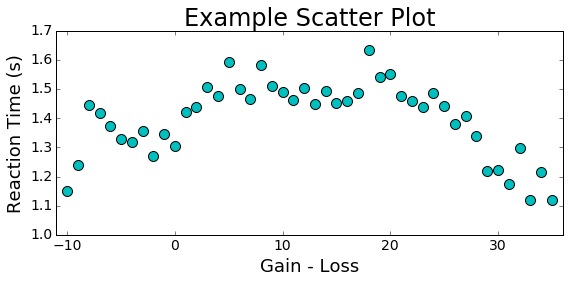

In [82]:
## Open new figure canvas. Define its size.
fig = plt.figure(figsize=(8,4))

## Make a new axis.
ax = plt.subplot(111)

## Plot gain. "s" controls the size of the marker; marker control the shape.
## Edgecolor adds an outline to the marker.
rt = data.groupby(['diff']).rt.mean()
ax.scatter( rt.index, rt, s=100, marker='o', color='c', edgecolor='k');

## Add details.
ax.set_xlim(-11, 36)
ax.set_xlabel('Gain - Loss', fontsize=18)
ax.set_ylabel('Reaction Time (s)', fontsize=18)
ax.tick_params(axis='both',which='major',labelsize=14)
ax.set_title('Example Scatter Plot', fontsize=24)

## Autoscore.
plt.tight_layout()

### Histrograms
Histograms are very easy fortunately. Here we will plot two subjects reaction times.

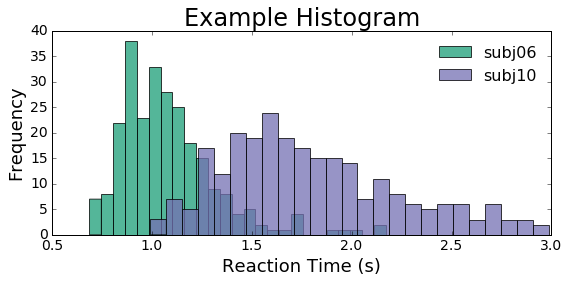

In [83]:
## Open new figure canvas. Define its size.
fig = plt.figure(figsize=(8,4))

## Make a new axis.
ax = plt.subplot(111)

## RT distribution for subj06.
ax.hist( data.loc[data.subj == 'subj06', 'rt'], bins=25, 
        label='subj06', color='#1b9e77', alpha=0.75 );

## RT distribution for subj10.
ax.hist( data.loc[data.subj == 'subj10', 'rt'], bins=25, 
        label='subj10', color='#7570b3', alpha=0.75 );

## Add details.
ax.set_xlabel('Reaction Time (s)', fontsize=18)
ax.set_ylabel('Frequency', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Example Histogram', fontsize=24)
ax.legend(loc='best', fontsize=16, frameon=False);

plt.tight_layout();

### Heatmaps
Heatmaps are very useful plots, but slightly counterintuitive in Matplotlib. We will go through an example looking at the average likelihood-of-take as a function of gain and loss. A full list of colormaps can be found [here](https://matplotlib.org/examples/color/colormaps_reference.html).  

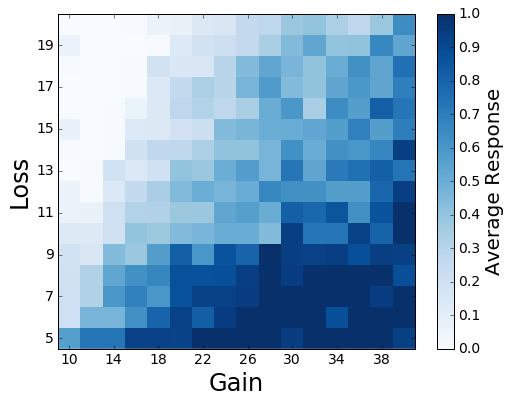

In [84]:
## Open new figure canvas. Define its size.
fig = plt.figure(figsize=(8,6))

## Make a new axis.
ax = plt.subplot(111)

## Make groupby object by gain and loss.
resp = data.groupby(['gain','loss']).respcat.mean()

## Extract as matrix and reshape (there are 16 unique values for each).
resp = resp.as_matrix().reshape(16,16).T

## Plot. The parameters are as follows:
#### aspect: defines scaling. automatic scaling is preferable.
#### interpolation: smoothing of image. We want no smoothing.
#### origin: upper or lower, we want smaller values to begin in lower corner.
#### cmap: what colormap to use.
#### vmin, vmax: min,max values of colormap.
cbar = ax.imshow(resp, aspect='auto', interpolation='none', 
                 origin='lower', cmap='Blues', vmin=0, vmax=1)

## Add details.
ax.set_xticks(np.arange(0,16,2))
ax.set_xticklabels(np.unique(data.gain)[::2], fontsize=14)
ax.set_xlabel('Gain', fontsize=24)

ax.set_yticks(np.arange(0,16,2))
ax.set_yticklabels(np.unique(data.loss)[::2], fontsize=14)
ax.set_ylabel('Loss', fontsize=24)

## Add colorbar.
cbar = plt.colorbar(cbar, ax=ax);
cbar.ax.tick_params(labelsize=14) 
cbar.set_label('Average Response', fontsize=20)

### Embedding Multiple Plots in a Figure
With Matplotlib, there are 3.5 methods for constructing a figure with multiple embedded plots. These vary from minimal control of layout to maximal control of layout, and are as follows:
1. subplot/subplots: generates equal sized plots in a figure.
2. subplot2grid: generates plots of different sizes along a grid, minimal spacing options.
3. gridspec: generates plots of different sizes, many spacing options.

We have previously present subplot. Briefly we will show how subplot and subplots can be used to make a multiply-embedded figure.

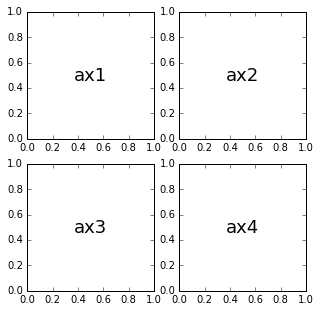

In [85]:
## Subplot example: Figure needs to be called.
fig = plt.figure(figsize=(5,5))

## Make 2x2 figure.
ax = plt.subplot(2,2,1)
ax.text(0.5,0.5,'ax1', fontsize=18, ha='center', va='center');

ax = plt.subplot(2,2,2)
ax.text(0.5,0.5,'ax2', fontsize=18, ha='center', va='center');

ax = plt.subplot(2,2,3)
ax.text(0.5,0.5,'ax3', fontsize=18, ha='center', va='center');

ax = plt.subplot(2,2,4)
ax.text(0.5,0.5,'ax4', fontsize=18, ha='center', va='center');

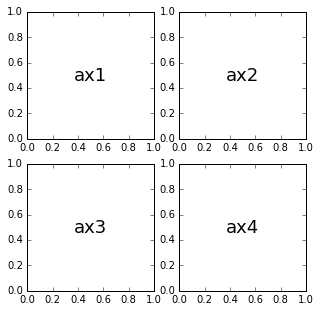

In [86]:
## Subplots example: Figure can be called directly from command.

## Make 2x2 figure. Note that figsize can be directly called.
## Axes is a [2,2]-list of axes.
fig, axes = plt.subplots(2,2,figsize=(5,5))

## Iteratively add text.
for n in range(4):
    axes[n/2,n%2].text(0.5,0.5,'ax%s' %(n+1), fontsize=18, ha='center', va='center');

To use subplot2grid(), you provide geometry of the grid and the location of the subplot in the grid. Here we present an example geometry for a 3x3 grid.

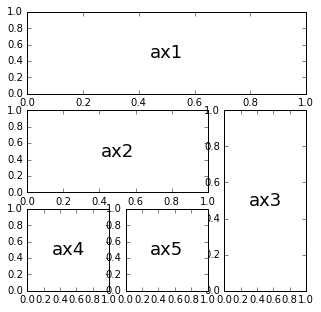

In [87]:
## subplot2grid example: Figure must be called.
fig = plt.figure(figsize=(5,5))

## Call subplot2grid. First argument specifies the global
## layout of the figure. Second argument specifies which
## axis you are generating. colspan/rowspan describes the
## length of the axes within the grid of the figure.

ax = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax.text(0.5,0.5,'ax1', fontsize=18, ha='center', va='center');

ax = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax.text(0.5,0.5,'ax2', fontsize=18, ha='center', va='center');

ax = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax.text(0.5,0.5,'ax3', fontsize=18, ha='center', va='center');

ax = plt.subplot2grid((3, 3), (2, 0))
ax.text(0.5,0.5,'ax4', fontsize=18, ha='center', va='center');

ax = plt.subplot2grid((3, 3), (2, 1))
ax.text(0.5,0.5,'ax5', fontsize=18, ha='center', va='center');

Gridspec objects are similar to subplot2grid in that they allow different sized plots within a figure. Gridspec objects also allow spacing configuration of axes within the figure. To give an example, we embed two sets of six plots with a large gap between them.

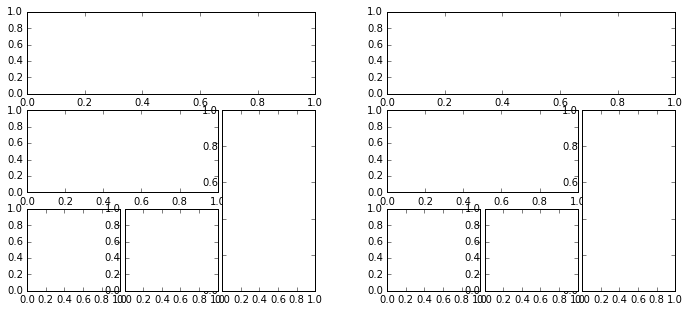

In [88]:
import matplotlib.gridspec as gridspec

## Initialize figure.
fig = plt.figure(figsize=(10,5))

## Define first 3x3 grid. 
gs = gridspec.GridSpec(3, 3)

## Update spacing parameters such that the figures can only
## extend to the 0.45 fraction of the figure.
gs.update(left=0.05, right=0.45, wspace=0.05)

## Create plots by indexing into grid.
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, :-1])
ax3 = plt.subplot(gs[1:, -1])
ax4 = plt.subplot(gs[-1, 0])
ax5 = plt.subplot(gs[-1, -2])

## Define second 3x3 grid. 
gs = gridspec.GridSpec(3, 3)

## Update spacing parameters such that the figures can only
## start at 0.55 fraction of the figure.
gs.update(left=0.55, right=0.95, wspace=0.05)

## Create plots by indexing into grid.
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, :-1])
ax3 = plt.subplot(gs[1:, -1])
ax4 = plt.subplot(gs[-1, 0])
ax5 = plt.subplot(gs[-1, -2])

## Pandas

Pandas also includes a number of plotting functions that help to cut down on code. For example, barplots can be constructed directly from a DataFrame object. The trouble is that these plots are fairly limited and require similar manual tweaking to get more aesthetically pleasing. They are useful, however, for quick inspections of the data.

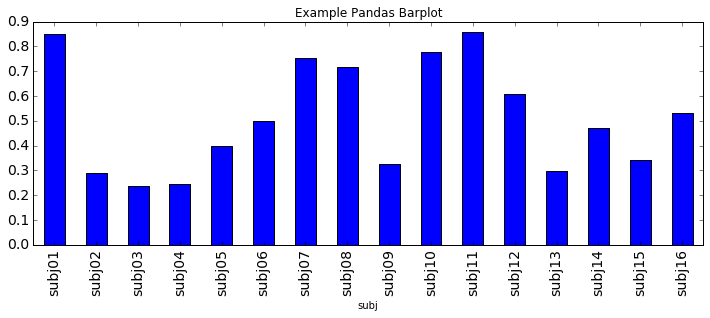

In [89]:
## Use groupby to compute averages.
gb = data.groupby('subj')
avg_resp = gb.respcat.mean()

## Make barplot from groupby object.
avg_resp.plot(kind='bar', figsize=(12,4), title='Example Pandas Barplot', fontsize=14);

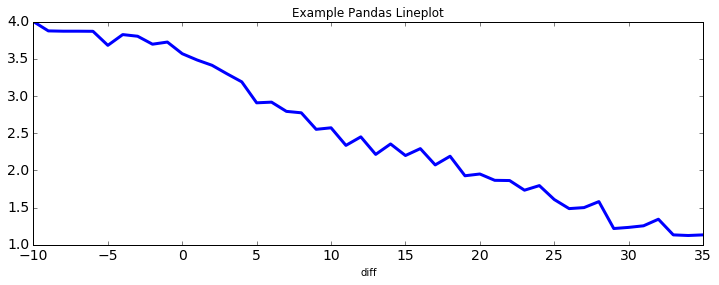

In [90]:
## Compute groupby gain.
gb = data.groupby('diff')
respnum_avg = gb.respnum.mean()

## Plot lineplot.
respnum_avg.plot('line', linewidth=3, figsize=(12,4), title='Example Pandas Lineplot', fontsize=14);

## Seaborn
The Seaborn statistical data visualization library was created to be the equivalent of ggplot2 for python. In other words, it is designed to rapidly turn around publication-ready plots from Pandas DataFrames with as minimal code as necessary. The [documention](https://seaborn.pydata.org/) is full of great examples that should be checked out. We will go through a few examples here.

### Style and Context
One of the great things about Seaborn is setting defaults. The defaults set a variety of parameters (e.g. colors, fonts, font sizes, etc.) that result in little tweaking of figures down the line. We introduce those two functions here.

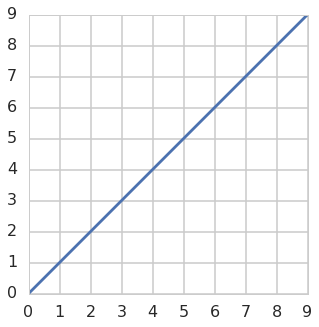

In [91]:
import seaborn as sns

## set_style sets the aesthetic style of the plots. This most dramatically 
## affects the background of plots and the presence (or absence) of gridlines.
sns.set_style('whitegrid')      # {white, whitegrid, dark, darkgrid}

## set_context sets the context parameters, affecting the size of labels,
## lines, and other elements of the plot.
sns.set_context('poster') # {notebook, paper, talk, poster}

## Text plot.
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(10), np.arange(10));

### Barplots
Let's first start by recreating the barplot from earlier (i.e. average response within subjects). As can be seen, substantially fewer lines of code are necessary. Moreover, 95% CIs are computed via bootstrap resampling.

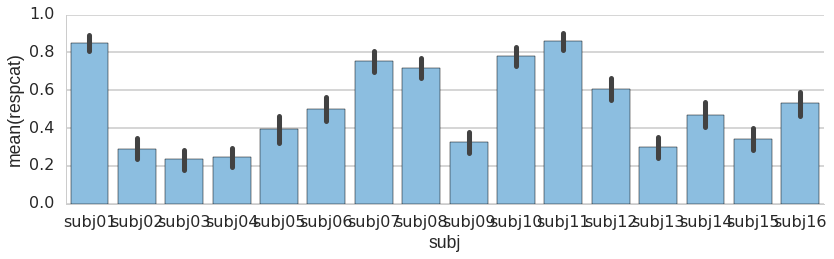

In [92]:
## Initialize figure.
fig = plt.figure(figsize=(12,4))

## Plot: Provide the x-axis, the y=axis, and dataframe.
sns.barplot('subj', 'respcat', data=data, color='#7ec0ee');

## Scale and cleanup plot.
sns.despine()
plt.tight_layout()

### Lineplots

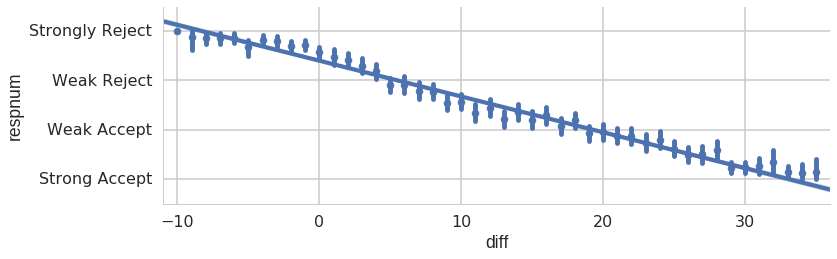

In [93]:
## Open new figure canvas. Define its size.
fig = plt.figure(figsize=(12,4))

## Plot line plot.
ax = sns.regplot('diff', 'respnum', data=data, x_bins=np.unique(data['diff']));

## Fix axes.
ax.set_xlim(-11,36)
ax.set_ylim(0.5,4.5)
ax.set_yticks([1,2,3,4])
ax.set_yticklabels(['Strong Accept', 'Weak Accept', 'Weak Reject', 'Strongly Reject'])

## Scale and cleanup plot.
sns.despine()
plt.tight_layout()

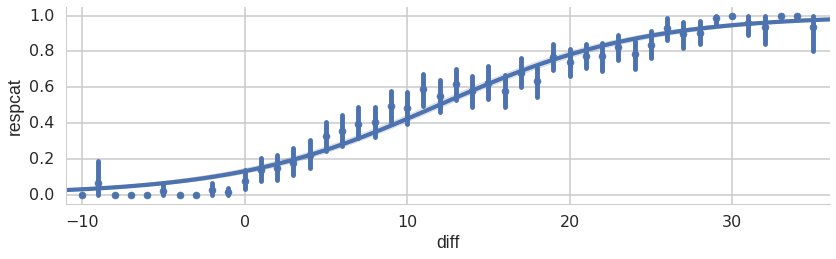

In [94]:
## Open new figure canvas. Define its size.
fig = plt.figure(figsize=(12,4))

## Plot line plot.
ax = sns.regplot('diff', 'respcat', data=data, x_bins=np.unique(data['diff']), logistic=True);

## Fix axes.
ax.set_xlim(-11,36)
ax.set_ylim(-0.05,1.05)

## Scale and cleanup plot.
sns.despine()
plt.tight_layout()

### Scatterplots

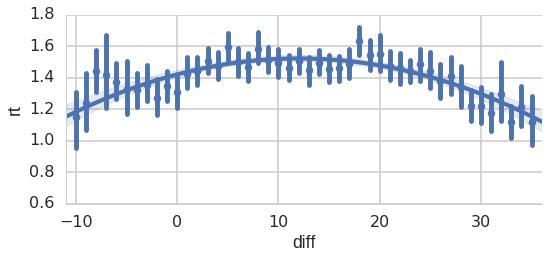

In [95]:
## Open new figure canvas. Define its size.
fig = plt.figure(figsize=(8,4))

## Make scatterplot.
ax = sns.regplot('diff', 'rt', data=data, order=2, x_bins=np.unique(data['diff']));
ax.set_xlim(-11,36)

## Scale and cleanup plot.
sns.despine()
plt.tight_layout()

### Histograms

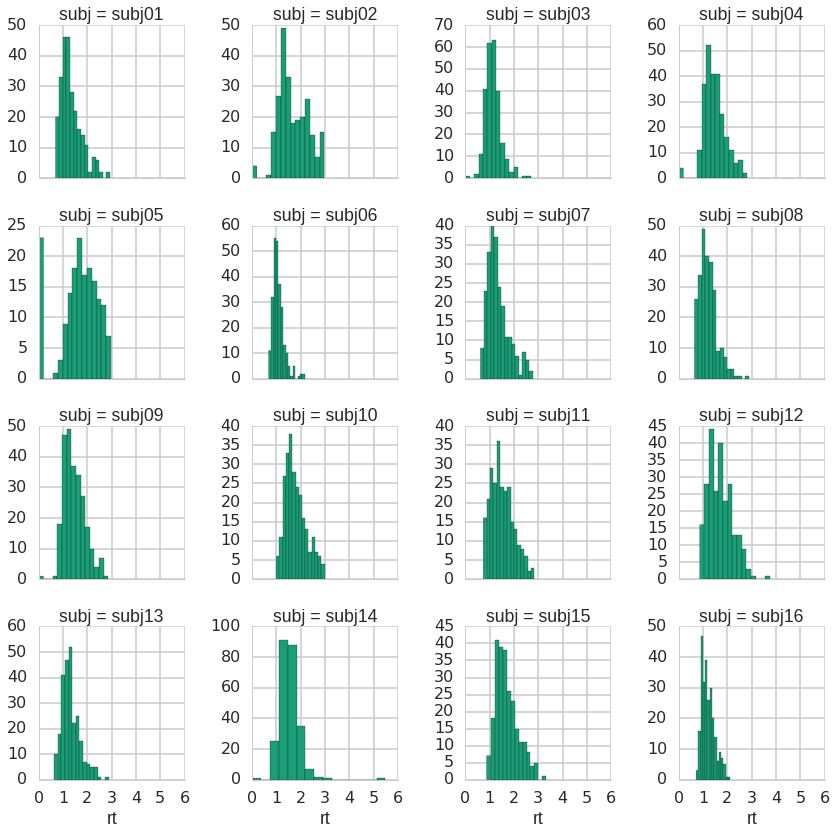

In [96]:
g = sns.FacetGrid(data, col='subj', col_wrap=4, sharex=True, sharey=False)
g.map(plt.hist, 'rt', bins=15, color='#1b9e77', lw=0.25);

### Heatmaps

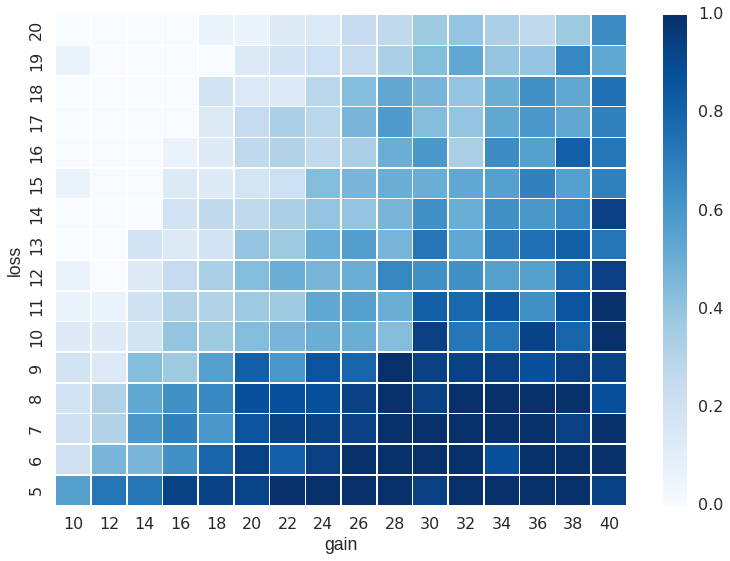

In [97]:
pivot = data.pivot_table(index='loss', columns='gain', values='respcat')
ax = sns.heatmap(pivot, vmin=0, vmax=1, cmap='Blues', linewidths=.5)
ax.invert_yaxis()

# Introduction to Statistics (SciPy + Statsmodels)
Statsmodels is the prominent statistical models package in the scientific python distribution. Statsmodels provides functionality for linear regression, generalized linear models, limited dependent variable models, ARMA and VAR models. The [Statsmodels documentation](http://www.statsmodels.org/stable/index.html) provides a full list of models and functions implemented. It draws its inspiration from the most popular R statistics packages (e.g. lme4) and uses the same statistical modeling syntax as R (e.g. "y ~ x"). As we will see, the package is still new and relatively limited as of the time of writing. Though the most basic models are implemented, more complex yet standard models (e.g. mixed-effects logistic regression) are not yet implemented. 

## Scipy Statistics Module
Before covering Statsmodels, we will first briefly introduce the scientific python (scipy) package. Expanding from NumPy (which provides the backend of arrays, matrices, and array-based functions), SciPy introduces a series of special modules for different important computations, including: integration, optimization, signal processing, image processing, and statistics. The [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/) details the many powerful tools the package introduces.

The [SciPy stats module](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) (scipy.stats) introduces a number of helpful functions, including:
* Statistical distributions (e.g. normal, student-t, inv-normal, gamma, beta, binomal..., [full list](https://docs.scipy.org/doc/scipy/reference/stats.html))
* Measures of distributional shape (e.g. kurtosis, skew, QQ-plots, KS-test)
* Basic statistical tests (e.g. linear correlation, nonparametric correlation, t-tests, one-way ANOVA, Chi-Square)

The SciPy package can be especially helpful when the user needs to compute quick statistics without necessarily needing to implement even simple models. 

### Interactive Probability Distributions
The SciPy package has already implemented a number of standard statistical distributions beyond the normal distribution. This can be combined with the awesome ipywidgets module to make interactive plots that help in understanding the influence of parameters in statistical distributions. Below we highlight the inverse-gamma distribution.

<function __main__.plot_invgamma>

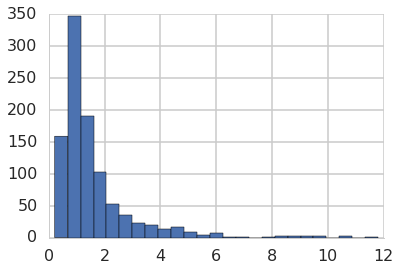

In [98]:
import numpy as np
from scipy.stats import invgamma
from ipywidgets import interact

def plot_invgamma(alpha, beta, n_samp=1000):
    
    ## Sample from inverse-gamma distribution.
    np.random.seed(47404)
    arr = invgamma(alpha,loc=0,scale=beta).rvs(n_samp)
    arr = arr[arr < 12] # prune for visualization purposes
    
    ## Plot.
    fig = plt.figure(figsize=(6,4))
    plt.hist(arr, bins=25);
    plt.xlim(0,12);
    sns.despine();
    
interact(plot_invgamma, alpha=(0.1,5,0.1), beta=(0.1,5,0.1))

### Descriptive Statistics
Scipy has a number of functions useful for diagnosing the shape of data distributions, including higher order moments (kurtosis, skew, etc.). We highlight these functions with the case of reaction times, which tend to be heavily right-skewed (heavy tails to the right of the central tendency). We measure the kurtosis of Subject 1's reaction times, and plot a QQ-plot fitted to a normal distribution.

The measured kurtosis is 1.080. (Normal: kurt=0)


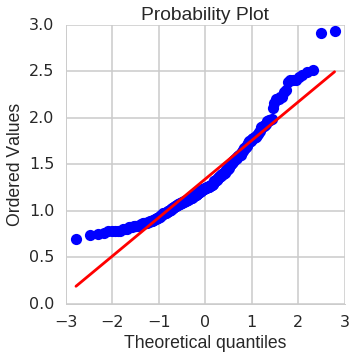

In [99]:
from scipy.stats import kurtosis, probplot

## Extract subj01 RTs.
rt = data.loc[data.subj == 'subj01', 'rt']

## Compute skew.
computed_skew = kurtosis(rt, fisher=True)
print('The measured kurtosis is %0.3f. (Normal: kurt=0)' %computed_skew)

## QQ-plot.
fig, ax = plt.subplots(1,1,figsize=(5,5))
probplot(rt, plot=ax);
sns.despine()

### Basic Statistics
SciPy also has implemented several basic statistical functions for quickly computing statistics:
* Correlations: Pearson correlation (pearsonr), Spearman correlation (spearmanr), Kendall Tau (kendalltau)
* T-tests: one-sample t-test (ttest_1samp), two-sample t-test (ttest_ind), dependent sample t-test (ttest_rel)
* ANOVA: One-way ANOVA (f_oneway)
* Chi-square (chisquare, chi2_contingency)

We will quickly highlight a few of these functions.

In [100]:
from scipy.stats import pearsonr, ttest_ind, f_oneway

## Simulate data from multivariate normal distribution.
## Two variables will share mean = 2, and two variables
## will be 0.4 correlated.

mu = [0,2,2]
cov = [[1.0, 0.4, 0.0],
       [0.4, 1.0, 0.0],
       [0.0, 0.0, 1.0]]

## Randomly sample 50 observations.
np.random.seed(47404)
mat = np.random.multivariate_normal(mu, cov, 50)

## Transpose so shape=(3,50)
mat = mat.T

## Compute correlation of pairs: (1,2), (1,3)
print('Correlation [1,2]: r = %0.3f, p = %0.3f' %pearsonr(mat[0], mat[1]))
print('Correlation [1,3]: r = %0.3f, p = %0.3f' %pearsonr(mat[0], mat[2]))

## Compute t-tests of pairs: (1,2), (2,3)
print('Indenpendent t-test [1,2]: t = %0.3f, p = %0.3f' %ttest_ind(mat[0], mat[1]))
print('Indenpendent t-test [2,3]: t = %0.3f, p = %0.3f' %ttest_ind(mat[1], mat[2]))

## Compute one-way ANOVA.
print('Oneway ANOVA: f = %0.3f, p = %0.3f' %f_oneway(*mat))

Correlation [1,2]: r = 0.305, p = 0.031
Correlation [1,3]: r = 0.091, p = 0.530
Indenpendent t-test [1,2]: t = -8.368, p = 0.000
Indenpendent t-test [2,3]: t = -1.503, p = 0.136
Oneway ANOVA: f = 55.325, p = 0.000


## Statsmodels
If you are familiar with R-styled formulas for regression, then Statsmodels + Pandas is a very powerful combo of packages for data analysis in python. We will cover only a few select examples, but know that many models are already implemented (e.g. OLS, GLM, GEE, WLS). Many more well-documented tutorials can be found [here](http://www.statsmodels.org/stable/examples/index.html#notebook-examples) and [here](https://github.com/statsmodels/statsmodels/wiki/Examples). 

### Linear Regression (OLS)
Below is a basic ordinary least squares (OLS) linear regression model measuring the relationship of subjective likelihood-of-take (respnum) against gain and loss.

In [101]:
from statsmodels.api import OLS

## Define formula.
formula = 'respnum ~ gain + loss'

## Define model.
model = OLS.from_formula(formula, data=data)

## Fit model.
result = model.fit()

## Print summary.
result.summary2()

/home/szoro/Documents/software/anaconda2.7/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.502    
Dependent Variable: respnum          AIC:                9277.1296
Date:               2017-05-30 12:22 BIC:                9295.9680
No. Observations:   3942             Log-Likelihood:     -4635.6  
Df Model:           2                F-statistic:        1991.    
Df Residuals:       3939             Prob (F-statistic): 0.00     
R-squared:          0.503            Scale:              0.61555  
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      2.5445    0.0495   51.3634  0.0000   2.4473   2.6416
gain          -0.0612    0.0014  -45.2514  0.0000  -0.0639  -0.0585
loss           0.1184    0.0027   43.6748  0.0000   0.1131   0.1237
------------------------------------------------------------------
Omnibus:               16.543       Durbin-Watson:          0.964 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       14.028
Skew:                  0.082        Prob(JB):               0.001 
Kurtosis:              2.759        Condition No.:          116   
==================================================================

"""

We can see if using only the diff variable is a more parsimonious fit of the data.

In [102]:
## Define formula.
formula = 'respnum ~ diff'

## Define model.
model = OLS.from_formula(formula, data=data)

## Fit model.
result = model.fit()

## Print summary.
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.458    
Dependent Variable: respnum          AIC:                9615.1054
Date:               2017-05-30 12:22 BIC:                9627.6643
No. Observations:   3942             Log-Likelihood:     -4805.6  
Df Model:           1                F-statistic:        3328.    
Df Residuals:       3940             Prob (F-statistic): 0.00     
R-squared:          0.458            Scale:              0.67083  
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      3.4015    0.0204  166.3721  0.0000   3.3615   3.4416
diff          -0.0727    0.0013  -57.6855  0.0000  -0.0752  -0.0702
------------------------------------------------------------------
Omnibus:               16.070       Durbin-Watson:          0.995 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       14.432
Skew:                  0.102        Prob(JB):               0.001 
Kurtosis:              2.786        Condition No.:          25    
==================================================================

"""

### Linear mixed effects models
We might want to try a mixed effects model here, assuming that some people have trait-level decisional biases (e.g. risk-averse, risk-seeking). 

In [103]:
from statsmodels.api import MixedLM

## Define formula.
formula = 'respnum ~ gain + loss'

## Define model.
model = MixedLM.from_formula(formula, data=data, groups=data.subj)

## Fit model.
result = model.fit()

## Print summary.
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: respnum   
No. Observations: 3942    Method:             REML      
No. Groups:       16      Scale:              0.3796    
Min. group size:  174     Likelihood:         -3735.8356
Max. group size:  256     Converged:          Yes       
Mean group size:  246.4                                 
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     2.551    0.130  19.592 0.000  2.296  2.806
gain         -0.061    0.001 -57.518 0.000 -0.063 -0.059
loss          0.118    0.002  55.373 0.000  0.114  0.122
groups RE     0.247    0.148                            
========================================================

"""

In [104]:
## Print random effects.
re = result.random_effects
for k,v in sorted(re.iteritems()):
    print('%s = %0.3f' %(k,v))

subj01 = -0.559
subj02 = 0.643
subj03 = 0.462
subj04 = 0.483
subj05 = 0.215
subj06 = 0.103
subj07 = -0.424
subj08 = -0.471
subj09 = 0.586
subj10 = -0.710
subj11 = -0.949
subj12 = -0.188
subj13 = 0.444
subj14 = 0.053
subj15 = 0.251
subj16 = 0.060


### Logistic Regression
Below is a basic logistic regression model measuring the relationship of categorical likelihood-of-take (respcat) against gain and loss.

In [105]:
from statsmodels.api import Logit

## Define formula.
formula = 'respcat ~ gain + loss'

## Define model.
model = Logit.from_formula(formula, data=data)

## Fit model.
result = model.fit()

## Print summary.
result.summary2()

Optimization terminated successfully.
         Current function value: 0.462073
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.333    
Dependent Variable: respcat          AIC:              3648.9865
Date:               2017-05-30 12:22 BIC:              3667.8248
No. Observations:   3942             Log-Likelihood:   -1821.5  
Df Model:           2                LL-Null:          -2730.9  
Df Residuals:       3939             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Intercept    0.0107    0.1440    0.0740  0.9410  -0.2716   0.2929
gain         0.1473    0.0054   27.1689  0.0000   0.1367   0.1579
loss        -0.2884    0.0108  -26.6478  0.0000  -0.3096  -0.2672
================================================================

"""

### ANOVA
As a basic example, we will perform a simple ANOVA testing for differences in the average reaction time across the diferent subjective likelihood-of-take values (respnum). 

In [106]:
import statsmodels.api as sm
from statsmodels.api import OLS

## Aggregate reaction times by subject and response category.
pivot_table = data.pivot_table(index='subj', columns='respnum', values='rt', aggfunc='median')

## Melt pivot table to long list.
llpt = pivot_table.melt(value_name='rt')

## Make respnum a categorical variable.
llpt['respnum'] = Categorical(llpt['respnum'])

## Define formula.
formula = 'rt ~ respnum'

## Define and fit model.
model = OLS.from_formula(formula, data=llpt)
fit = model.fit()

## Fit ANOVA model.
aov_table = sm.stats.anova_lm(fit, typ=2)
print aov_table

            sum_sq    df         F    PR(>F)
respnum   1.285252   3.0  4.825201  0.004481
Residual  5.327248  60.0       NaN       NaN


### Generalized Linear Models (GLM)
We finish with a generalized linear model showing the improvement of modeling reaction times with the gamma family of distributions. We show a regression of the diff variable and diff-squared on reaction time.

In [107]:
from statsmodels.api import GLM, families

## Add new column.
data['diff2'] = data['diff'] ** 2

## Define formula.
formula = 'rt ~ diff + diff2'

## Fit model (when no family specified, defaults to normal distribution.)
result = GLM.from_formula(formula, data=data, subset=data.subj == 'subj01').fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            282.8863  
Link Function:      identity         BIC:            -1352.1767
Dependent Variable: rt               Log-Likelihood: -138.44   
Date:               2017-05-30 12:22 LL-Null:        -145.72   
No. Observations:   255              Deviance:       44.222    
Df Model:           2                Pearson chi2:   44.2      
Df Residuals:       252              Scale:          0.17548   
Method:             IRLS                                       
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept    1.3914    0.0428  32.5233  0.0000   1.3075   1.4752
diff         0.0093    0.0062   1.4994  0.1338  -0.0029   0.0215
diff2       -0.0006    0.0002  -2.8168  0.0049  -0.0011  -0.0002
===============================================================

"""

In [108]:
## Fit model with gamma family.
result = GLM.from_formula(formula, data=data, subset=data.subj == 'subj01', 
                          family=families.Gamma()).fit()
result.summary2()

/home/szoro/Documents/software/anaconda2.7/lib/python2.7/site-packages/statsmodels/genmod/generalized_linear_model.py:244: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            237.3881  
Link Function:      inverse_power    BIC:            -1374.3599
Dependent Variable: rt               Log-Likelihood: -115.69   
Date:               2017-05-30 12:22 LL-Null:        -123.62   
No. Observations:   255              Deviance:       22.038    
Df Model:           2                Pearson chi2:   25.0      
Df Residuals:       252              Scale:          0.099319  
Method:             IRLS                                       
----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
----------------------------------------------------------------
Intercept     0.7187    0.0238  30.2082  0.0000   0.6721  0.7653
diff         -0.0059    0.0036  -1.6395  0.1011  -0.0130  0.0012
diff2         0.0004    0.0001   2.9388  0.0033   0.0001  0.0007
===============================================================

"""